# Tutorial: Introduction to RMPL

Make sure you load the dependencies below by highlighting the cell below and pressing Shift + Enter.

In [1]:
%reload_ext autoreload
%autoreload 2
from src.utils import prep_browser, display_video, compile_rmpl, schedule_and_viz_plan

# Introduction <a id="introduction"/>

The goal of this tutorial is to introduce you to two technologies developed by the MERS group: the Reactive Model-based Programming Language (RMPL) and the Kirk Planner.

RMPL is a language designed for planning and execution with a focus on expressive constraints. Capturing the essence of "model-based programming", RMPL gives users the ability program an agent by outlining how the agent is expected to behave during execution at a high-level, abstracting away low-level details. RMPL as a language has been through many many iterations but is currently implemented with a [Lisp](http://www.gigamonkeys.com/book/)-like syntax. Don't worry; you'll come to appreciate all the parentheses!

The Kirk planner, deriving it's name from the [infamous captain of the USS Enterprise](https://en.wikipedia.org/wiki/James_T._Kirk), excels at making tough choices. Taking an RMPL program as input, Kirk compiles the program, ensures that the activities specified by the program are temporally consistent and do not conflict with each other, and makes choices that the user left unresolved, subject to the constraints in the program. At its core, Kirk uses constraint satisfaction algorithms.

In this tutorial, we will be focusing on the basics of RMPL and the temporal consistency checking feature of the Kirk planner. You will be modeling a couple of scenarios in RMPL and compiling them using Kirk. 

Keep in mind that both RMPL and Kirk are research products that are still under active development. While we have done our best to ensure that you have stable technology to work with, please let us know of any issues or bugs you encounter in their respective repositories. Questions, comments, and suggestions are welcome as well!

Finally, we have included a manual of the RMPL language to accompany this tutorial. You don't need to read the entire thing to complete this tutorial; we will point you to relevant sections along the way. The manual can be found in `docs/rmpl-primer.pdf`.

#### Tutorial Contents
1. [Introduction](#introduction)
2. [RMPL Basics](#rmpl-basics)
    1. [Exercise 1: Running Late!](#exercise-1)
    

### Preparing your browser <a id='prep-browser'/>

This notebook relies on some JavaScript code to visualize the planner's output. Evaluate the following cell to preload this code into your browser.

<div class="alert alert-info">
<strong>Note:</strong> You must re-evaluate this cell anytime you open the notebook in a new tab or restart the kernel.
</div>

In [2]:
prep_browser()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# RMPL Basics <a id="rmpl-basics"/>

The follow video will give you an introduction to RMPL syntax. Run the following cell to display the video.

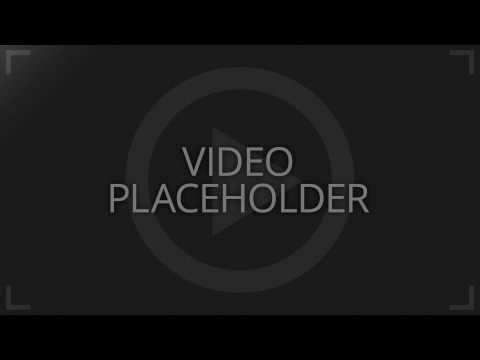

In [3]:
display_video("https://www.youtube.com/watch?v=NpEaa2P7qZI", width=800, height=600)

Next, you are going to try your hand at modeling a real-world problem in RMPL.

## Exercise 1: Running late! <a id="exercise-1"/>

Oh no! You woke up late and if you don't hurry you are going to be late for your exam! (And if you are out of school already, maybe this is a recurring nightmare you have...)

![Running late!](img/running-late.jpg)

> It's currently 9:30 am and you need to arrive on campus before your exam start at 10:30 am but you still have a lot to do (you just woke up after all)! First, you need to take a shower, which will take you between 5 and 10 minutes. Once you are done, you'll multitask to save time. You can eat your breakfast (which takes at least 15 minutes but not more than 20 minutes) while you finish up some school work. You need to first finish a homework assignment and then review your notes for your exam (each takes 10 to 15 minutes to complete). After you are done studying and eating, you need to pack your bag. You've nailed this part so it takes you exactly 5 minutes. Finally, you'll ride your bike to class - that could take between 15 and 20 minutes. Can you make it to school on time?

Let's model the problem in RMPL to find out! We have started an RMPL model for you in `exercise-1.rmpl`. Go back to the home directory and select the file to continuing editing it. Because RMPL is a Lisp-like language, it's useful to select "Common Lisp" as the language in the built in editor (found in the menu bar next to "View"). Feel free to download the file and edit it locally using the editor of your choice. Be sure to re-upload the file before you continue. In case you get stuck, we have completed a model of this problem under `solutions/exercise-1-solution.rmpl`.

We recommend reading through sections (TODO add section from manual) from the RMPL manual.

### Compile a temporal plan network (TPN)

Recall from the video that the Kirk planner compiles an RMPL program into a graph like representation called **temporal plan network or TPN**. Each node in the TPN is called an **event**. Events represent distinct moments in time, like the start of a activity. Edges in a TPN can either be **episodes** or temporal **constraints**. Episodes are directed edges between two events and represent activities. Episodes have bounds on how long an activity could take. Constraints are also directed edges between two events however, instead of activites, these capture capture constraints between activities in the plan such as ordering two activties or enforcing a deadline for the completion of several activities. 

Below is an example of a TPN, labeled with events, episodes, and constraints.There are four episodes capturing four different activities: A, B, C, and D. Activity A takes exactly 5 minutes while activity D takes between 6 to 8 minutes. The constraints are represented by the dashed edges and give some more information about this plan. For example, activity A must end before activities B and C can start but activities B and C can happen concurrently.

![example TPN](img/tpn-example.jpg)

Let's use the Kirk planner to generate a TPN for our morning rush example.

In [16]:
# Run this cell to call the Kirk planner on your RMPL model and vizualize the tpn.
#TODO update this with a call to the Kirk server.
compile_rmpl("solutions/exercise-1-solution.rmpl", output_plan="exercise-1-tpn.json")

Plan found!

*Note:* You can click, drag, and zoom the TPN display above.

Great! Now we have a TPN for our rushed morning routine. We can see the activities we need to perform, their temporal bounds and how they should be ordered.

### Schedule the TPN

We need to generate a schedule for our rushed morning routine. We can use the TPN to determine when we should start and end each of our morning activites to make it to school on time.

Let's run the scheduler.

In [17]:
schedule_and_viz_plan("exercise-1-tpn.json")

Schedule: 

{
 "start-plan": 0.0,
 "end-plan": 49.38330448660487,
 "start-PACK-BAG": 28.63585546840814,
 "end-PACK-BAG": 33.63585546840814,
 "start-REVIEW-NOTES": 6.653281598271721,
 "end-REVIEW-NOTES": 17.154469547107567,
 "start-EAT-BREAKFAST": 6.600679186741245,
 "end-EAT-BREAKFAST": 24.244128030866012,
 "start-SHOWER": 0.0,
 "end-SHOWER": 5.2748386231199245,
 "start-FINISH-HOMEWORK": 17.154469547107567,
 "end-FINISH-HOMEWORK": 27.971943267811188,
 "start-BIKE-TO-SCHOOL": 33.63585546840814,
 "end-BIKE-TO-SCHOOL": 49.38330448660487
}


Schedule found!

Nice! The scheduler was able to find a schedule for our morning routine to get us to school on time. Looks like we will be able to take that exam!

Note that there are many possible feasible schedules for this plan. Try running the scheduler again. Do you get the same schedule of activties?

In the following section, we will talk more about how the scheduler checks temporal consistency, examine a plan that is temporally inconsistent, and walk through the algorithm for generating a schedule. 